# Idea 1 (Getting Familiar with the Dataset)

#### This part is the first step of the project. In this notebook we try to figure out what is our data and what we can do with it. In the other word, in this notebook we try to get familiar with the data and generate new ideas for the next parts. Let's see what we have :)

#### At first we setup the pre-requirements for coding.

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=fc996de32612553b27601fbfb2a44b4a609b05471b770ad1c7dfbea30ef52231
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The followin

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/MDA_Project_Dataset/MDA2022ProjectData.zip" -d "./"

Archive:  /content/drive/MyDrive/MDA_Project_Dataset/MDA2022ProjectData.zip
  inflating: ./MDA2022ProjectData.csv  


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,TimestampType

spark = SparkSession \
    .builder \
    .appName("Spark_Processor") \
    .master("local[*]") \
    .getOrCreate()

sc = spark.sparkContext

schema = StructType([ \
        StructField("DEVICE_CODE", IntegerType(), True), 
        StructField("SYSTEM_ID",IntegerType(),True), \
        StructField("ORIGINE_CAR_KEY",IntegerType(),True), \
        StructField("FINAL_CAR_KEY", IntegerType(),True), \
        StructField("CHECK_STATUS_KEY", IntegerType(), True), \
        StructField("COMPANY_ID", StringType(), True), \
        StructField("PASS_DAY_TIME", TimestampType(), True)
    ])

#### Now in below cell, first 5 row of the data are shown.

In [ ]:
df = spark.read.csv('MDA2022ProjectData.csv',header=True,schema=schema)
df.show(20)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|   22010047|      284|       63455590|     63455590|               6|       161|2021-12-22 00:59:30|
|   22010054|      284|       63566637|     64111706|               7|       161|2021-12-22 01:24:58|
|   22010057|      284|       63653636|     63653636|               6|       161|2021-12-22 00:46:37|
|   22010039|      284|       63562975|     64111706|               7|       161|2021-12-22 00:27:32|
|   22010053|      284|       63634047|     64111706|               7|       161|2021-12-22 01:29:24|
|  100701119|      284|       63466030|     64111706|               7|       161|2021-12-22 01:05:33|
|   22010047|      284|       63479234|     63479234|               6|       161|2

#### As we can see the data has 7 columns which contains: “DEVICE_CODE”, “SYSTEM_ID”, “ORIGINE_CAR_KEY”, “FINAL_CAR_KEY” etc.

#### Now in this part we try to report the data by using summary command. The summary function shows many aspects of the dataframe such as mean, variance, SD, min, max, first quartile, third quartile and etc. The result of summarizing is shown in below cell.

In [ ]:
df.summary().show()

+-------+--------------------+------------------+--------------------+--------------------+-----------------+------------------+
|summary|         DEVICE_CODE|         SYSTEM_ID|     ORIGINE_CAR_KEY|       FINAL_CAR_KEY| CHECK_STATUS_KEY|        COMPANY_ID|
+-------+--------------------+------------------+--------------------+--------------------+-----------------+------------------+
|  count|           137860560|         137860560|           137860560|           137500256|        137500256|         137860560|
|   mean|2.0409413625759594E7|228.91315492262618|3.8876864354355924E7| 4.023159558635585E7| 5.43343081484881|214.39138850879468|
| stddev| 3.658430903524803E7| 87.57389372594602|3.2729616408470348E7|3.1743341283397306E7|0.696407497939759| 65.47375894020084|
|    min|                 100|                81|             7631921|             7631921|                1|                 0|
|    25%|              631799|               102|            10104804|            10326422|      

#### Now for the first attempt we try to count number of the all rows of data ,number of cars, number of cameras, number of systems, number of companies in the below cell. The result is shown in below:

In [ ]:
data_count = df.count()
car_count = df.select('FINAL_CAR_KEY').distinct().count()
camera_count = df.select('DEVICE_CODE').distinct().count()
system_count = df.select('SYSTEM_ID').distinct().count()
company_count = df.select('COMPANY_ID').distinct().count()

print('the numbers of all of the data =  ', data_count)
print('the numbers of all the cars =  ', car_count)
print('the numbers of all the cameras =  ', camera_count)
print('the numbers of all the systems =  ', system_count)
print('the numbers of all the companies =  ', company_count)

the numbers of all of the data =   137860560
the numbers of all the cars =   11825779
the numbers of all the cameras =   983
the numbers of all the systems =   10
the numbers of all the companies =   7


#### Now in the next cell we try to find the most passed cars and see which car has the most passing through cameras. The result is shown in below.

In [ ]:
car_passing_count = df.groupBy('FINAL_CAR_KEY').count()
car_passing_count.sort('count', ascending=False).show(10)

+-------------+--------+
|FINAL_CAR_KEY|   count|
+-------------+--------+
|     64111706|12749535|
|         null|  360304|
|     69177480|  321060|
|      8073331|  147394|
|     91715532|    3033|
|      7633319|    2208|
|      7682972|    1834|
|      8282689|    1667|
|     12481252|    1655|
|      8396536|    1651|
+-------------+--------+
only showing top 10 rows



#### As we can see, we have some null cars in the data. We can conclude that the data may have some null values. In this part we try to delete the rows with null values in 'FINAL_CAR_KEY' in the dataset and then try to count the cars. the result is shown in below cell.

In [ ]:
car_passing_count_without_null = car_passing_count.na.drop('any')
car_passing_count_without_null_sort = car_passing_count_without_null.sort('count', ascending=False)
car_passing_count_without_null_sort.show(10)

+-------------+--------+
|FINAL_CAR_KEY|   count|
+-------------+--------+
|     64111706|12749535|
|     69177480|  321060|
|      8073331|  147394|
|     91715532|    3033|
|      7633319|    2208|
|      7682972|    1834|
|      8282689|    1667|
|     12481252|    1655|
|      8396536|    1651|
|     76478733|    1644|
+-------------+--------+
only showing top 10 rows



#### Now we try to plot the histogram of the most passed car in a relative way and see the result in the below cell. The histogram shows number of cars that total cameras recorded at least a single time.

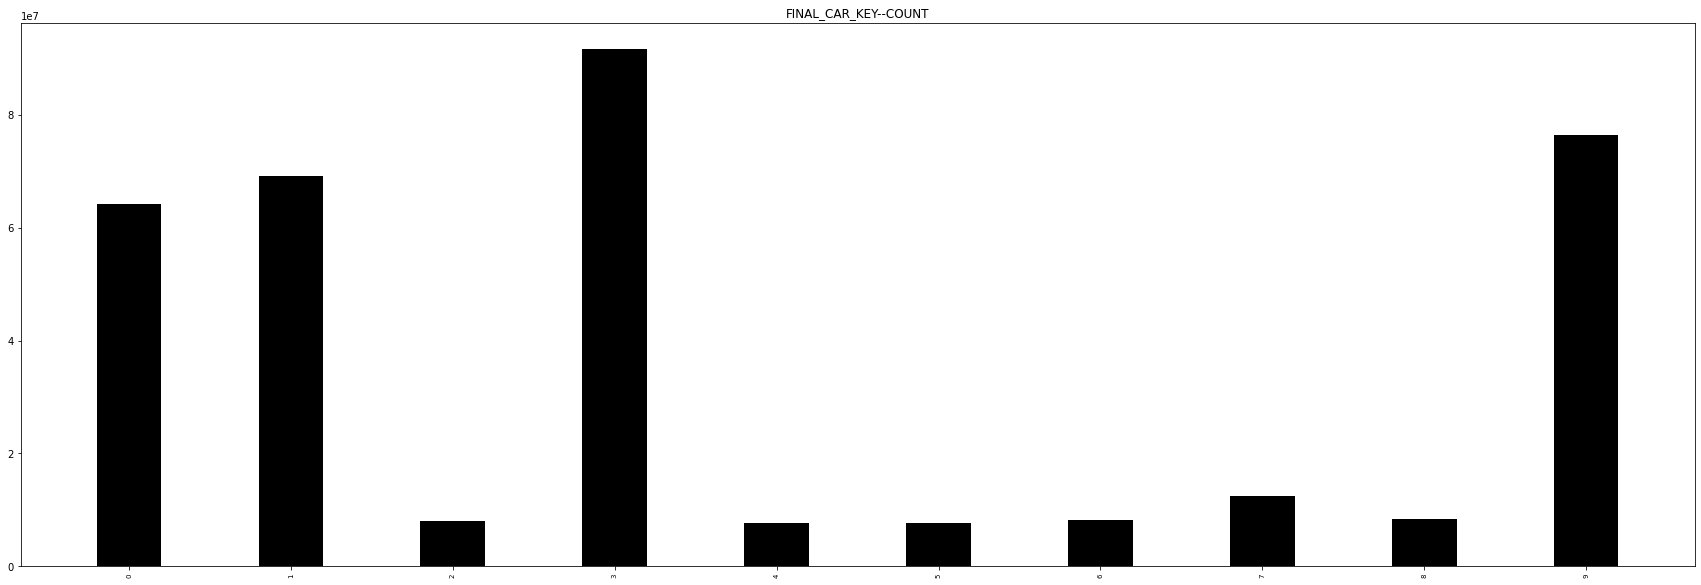

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (30, 10))
cars = car_passing_count_without_null_sort.select('FINAL_CAR_KEY').rdd.flatMap(lambda x: x).take(10)
names = list(map(lambda x: str(x), range(len(cars))))


#### We can have a sense from the count of the cars in this histogram relatively. As we have 4 cars which are recorded too much rather than other cars, we can count them as outliers but as I said it doesn’t have huge effect in the result of the work.

# Idea 2 (Plotting Histogram by Using Clustering)
#### In this part at first we cluster cameras to figure out pattern of passing cars in each streets and roads. Then we plot the histogram of each cluster cameras.

#### At first we do some pre processing on the data and make vecotrs and data frame for clustering and plotting histograms.

In [ ]:
from pyspark.sql.functions import dayofyear
from pyspark.sql.functions import hour,dayofweek
df = df.withColumn('day', dayofyear(df.PASS_DAY_TIME))
df = df.filter(df.day != 159)  ### for removing the day number 8 from dataset to have just 1 week in the dataset
df.show(40)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|day|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|   22010047|      284|       63455590|     63455590|               6|       161|2021-12-22 00:59:30|356|
|   22010054|      284|       63566637|     64111706|               7|       161|2021-12-22 01:24:58|356|
|   22010057|      284|       63653636|     63653636|               6|       161|2021-12-22 00:46:37|356|
|   22010039|      284|       63562975|     64111706|               7|       161|2021-12-22 00:27:32|356|
|   22010053|      284|       63634047|     64111706|               7|       161|2021-12-22 01:29:24|356|
|  100701119|      284|       63466030|     64111706|               7|       161|2021-12-22 01:05:33|356|
|   22010047|      284|       63479234|     63

#### Now we add week and hour to dataframe in this part.

In [ ]:
time_df = df.withColumn('weekday', dayofweek(df.PASS_DAY_TIME))
time_df = time_df.withColumn('hour', hour(df.PASS_DAY_TIME))
time_df = time_df.select('DEVICE_CODE', 'FINAL_CAR_KEY', 'weekday', 'hour')
time_df.show(40)

+-----------+-------------+-------+----+
|DEVICE_CODE|FINAL_CAR_KEY|weekday|hour|
+-----------+-------------+-------+----+
|   22010047|     63455590|      4|   0|
|   22010054|     64111706|      4|   1|
|   22010057|     63653636|      4|   0|
|   22010039|     64111706|      4|   0|
|   22010053|     64111706|      4|   1|
|  100701119|     64111706|      4|   1|
|   22010047|     63479234|      4|   0|
|   22010078|     64111706|      4|   1|
|  100701298|     63473689|      4|   0|
|   22010054|     62996037|      4|   0|
|   22010054|     64111706|      4|   1|
|   22010044|     62982992|      4|   1|
|  100701144|     63604895|      4|   0|
|   22010053|     64111706|      4|   0|
|   22010044|     63011708|      4|   1|
|   22010039|     63318470|      4|   0|
|   22010048|     63594865|      4|   1|
|  100701148|     64111706|      4|   2|
|   22010054|     63326471|      4|   0|
|   22010047|     63547093|      4|   0|
|   22010040|     64111706|      4|   1|
|   22010040|   

#### Now obtain the day and hour and key of each passing car for each week through a camera by groupBy command. The reuslt is show in below.

In [ ]:
cam_day = time_df.groupBy('DEVICE_CODE','weekday','hour').count()
cam_day.show(40)

+-----------+-------+----+-----+
|DEVICE_CODE|weekday|hour|count|
+-----------+-------+----+-----+
|     635555|      4|   1|    9|
|     203902|      4|   1| 1652|
|     900123|      4|   1|  326|
|        102|      4|   0|  210|
|  100700964|      4|   1|   80|
|     631887|      4|   0|    9|
|     811002|      4|   0|   10|
|  100700973|      4|   1|  107|
|     204902|      4|   1|  223|
|     900159|      4|   3|   29|
|     900136|      4|   1|   10|
|  100701136|      4|   2|    1|
|     631357|      4|   2| 1397|
|        163|      4|   4|   74|
|     900161|      4|   5|  187|
|     207501|      4|   5|  146|
|   22009842|      4|   1|    3|
|     635612|      4|   1|    4|
|   22009832|      4|   2|   18|
|     900161|      4|   6| 1819|
|     900251|      4|   6|  705|
|   22000801|      4|   5|    3|
|     810110|      4|   7|   83|
|  100700929|      4|   9| 2878|
|     204902|      4|   9|  478|
|     212002|      4|   8|  404|
|     631783|      4|   8|  150|
|     9001

#### Now we add camera indices to the dataframe for clustering in the next parts.

In [ ]:
from pyspark.ml.feature import StringIndexer

cam_day_index = StringIndexer(inputCol='DEVICE_CODE', outputCol='index_camera').fit(camera_daily_df).transform(camera_daily_df)
cam_day_index.show(40)

+-----------+-------+----+-----+------------+
|DEVICE_CODE|weekday|hour|count|index_camera|
+-----------+-------+----+-----+------------+
|     635555|      4|   1|    9|       692.0|
|     203902|      4|   1| 1652|       147.0|
|     900123|      4|   1|  326|       932.0|
|        102|      4|   0|  210|        80.0|
|  100700964|      4|   1|   80|        38.0|
|     631887|      4|   0|    9|       586.0|
|     811002|      4|   0|   10|       592.0|
|  100700973|      4|   1|  107|        40.0|
|     204902|      4|   1|  223|       153.0|
|     900159|      4|   3|   29|       359.0|
|     900136|      4|   1|   10|       617.0|
|  100701136|      4|   2|    1|       727.0|
|     631357|      4|   2| 1397|       253.0|
|        163|      4|   4|   74|       123.0|
|     900161|      4|   5|  187|       360.0|
|     207501|      4|   5|  146|       165.0|
|   22009842|      4|   1|    3|       783.0|
|     635612|      4|   1|    4|       537.0|
|   22009832|      4|   2|   18|  

#### Now in this part, we define some functions for obtaining features and converting dataframe columns to vectors. The functions are defined in below and the results are shown after them.

In [ ]:
from pyspark.mllib.linalg import Vectors
def transData(data):
    return data.rdd.map(lambda r: [Vectors.dense(r[:-1])]).toDF(['features'])

def generate_vector(input):
    cam = input[0]
    day = input[1]
    vec = 168*[0]

    for y in day:
        index = y[0]
        count = y[1]
        vec[index] = count
    return (cam, vec)


In [ ]:
transformed= transData(time_df)
transformed.show(40, False)

+------------------------------+
|features                      |
+------------------------------+
|[2.2010047E7,6.345559E7,4.0]  |
|[2.2010054E7,6.4111706E7,4.0] |
|[2.2010057E7,6.3653636E7,4.0] |
|[2.2010039E7,6.4111706E7,4.0] |
|[2.2010053E7,6.4111706E7,4.0] |
|[1.00701119E8,6.4111706E7,4.0]|
|[2.2010047E7,6.3479234E7,4.0] |
|[2.2010078E7,6.4111706E7,4.0] |
|[1.00701298E8,6.3473689E7,4.0]|
|[2.2010054E7,6.2996037E7,4.0] |
|[2.2010054E7,6.4111706E7,4.0] |
|[2.2010044E7,6.2982992E7,4.0] |
|[1.00701144E8,6.3604895E7,4.0]|
|[2.2010053E7,6.4111706E7,4.0] |
|[2.2010044E7,6.3011708E7,4.0] |
|[2.2010039E7,6.331847E7,4.0]  |
|[2.2010048E7,6.3594865E7,4.0] |
|[1.00701148E8,6.4111706E7,4.0]|
|[2.2010054E7,6.3326471E7,4.0] |
|[2.2010047E7,6.3547093E7,4.0] |
|[2.201004E7,6.4111706E7,4.0]  |
|[2.201004E7,6.4111706E7,4.0]  |
|[1.00701119E8,6.3548585E7,4.0]|
|[2.2010053E7,6.4111706E7,4.0] |
|[2.2010054E7,6.4111706E7,4.0] |
|[2.2010078E7,6.3182108E7,4.0] |
|[210110.0,6.336839E7,4.0]     |
|[2.201004

#### Now in this part we implement a LDA clustering to cluster different cameras and then plot histograms of record of passing cars through each cameras. 

In [ ]:
from pyspark.mllib.clustering import LDA
from pyspark.mllib.linalg import Vectors
cam_vec = cam_day.rdd.map(lambda x: (x['DEVICE_CODE'], ((x['weekday']-1)*24 + x['hour'],x['count']))).groupByKey().mapValues(list).map(generate_vector)
lda_model = LDA.train(cam_vec.map(lambda x: [x[0], Vectors.dense(x[1])]), k = 6)
clusters = lda_model.topicsMatrix()

#### Now in this part we plot histogram of each cameras in different days of week. We differ each camera of the streets with different colors which specify each camera.
#### We fix number of cluster centers equal to 6 cluster and deploy the clustering on each camera.
#### Our clustering shows different types of streets in the city. In the other words, we plot number of passing cars to recognize how much each street get crowded and analyze number of cars in each street in specific hours.
#### With this approach, we can have a sense of number of passing cars from near cameras, because we deployed a clustering on cameras so if center of a clustering has a specific histogram, we can conclude that the pattern and histogram of near cameras so we can say that near cameras to each clustering centers, has approximately a same histogram.


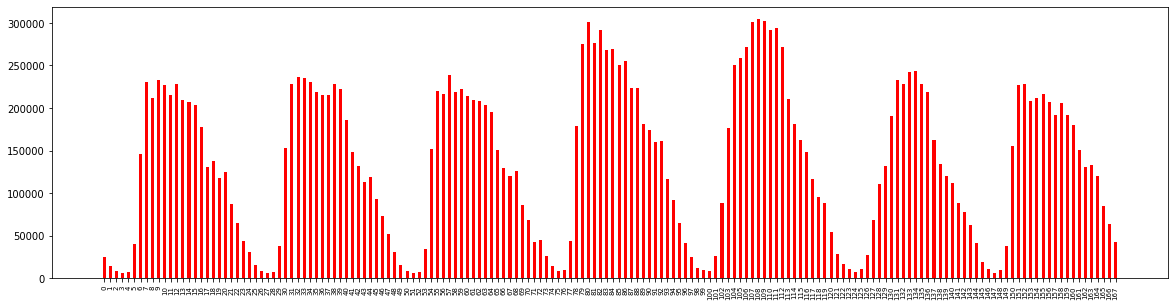

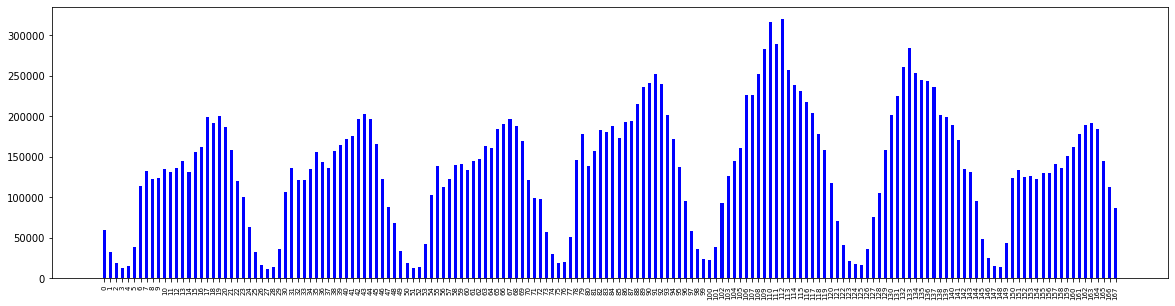

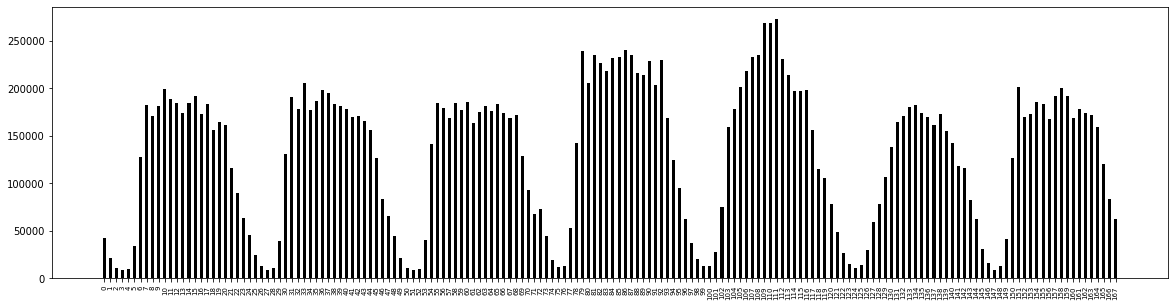

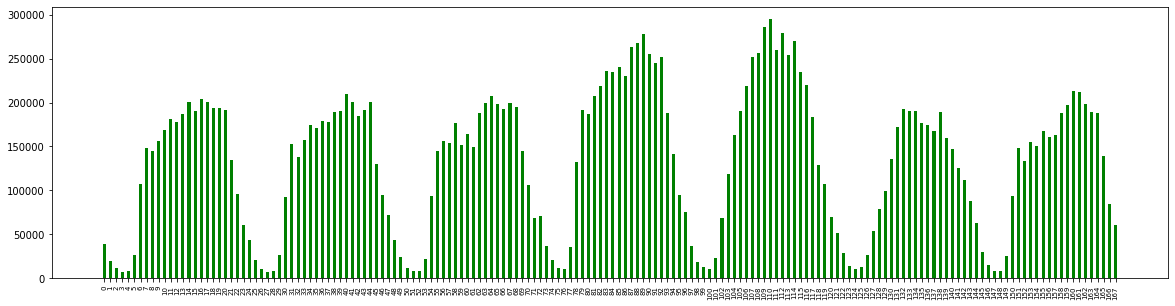

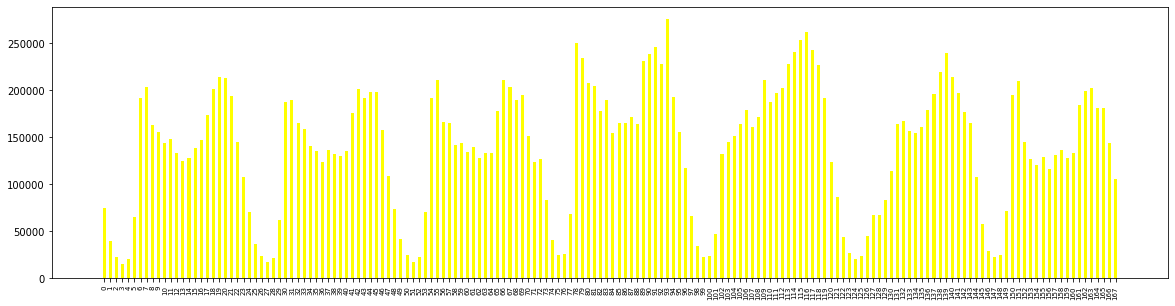

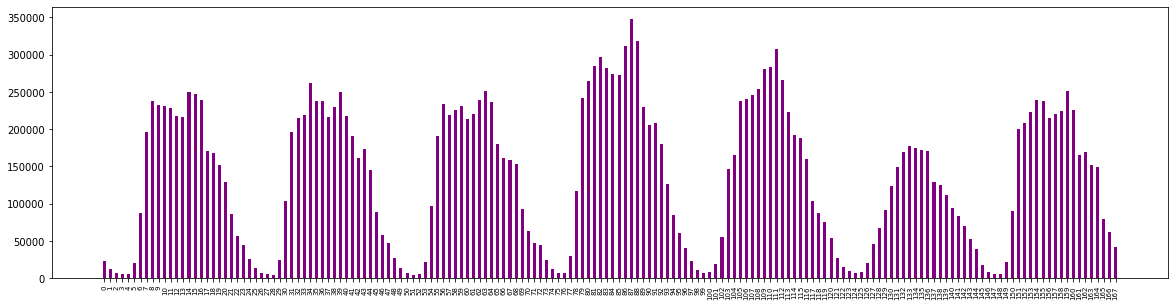

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,5))
labels = list(map(lambda x: str(x), range(168)))
plt.bar(labels, clusters[:,0], color ='red', width = 0.5)
plt.xticks(rotation='vertical', fontsize=7)
plt.show()

fig = plt.figure(figsize = (20,5))
labels = list(map(lambda x: str(x), range(168)))
plt.bar(labels, clusters[:,1], color ='blue', width = 0.5)
plt.xticks(rotation='vertical', fontsize=7)
plt.show()

fig = plt.figure(figsize = (20,5))
labels = list(map(lambda x: str(x), range(168)))
plt.bar(labels, clusters[:,2], color ='black', width = 0.5)
plt.xticks(rotation='vertical', fontsize=7)
plt.show()

fig = plt.figure(figsize = (20,5))
labels = list(map(lambda x: str(x), range(168)))
plt.bar(labels, clusters[:,3], color ='green', width = 0.5)
plt.xticks(rotation='vertical', fontsize=7)
plt.show()

fig = plt.figure(figsize = (20,5))
labels = list(map(lambda x: str(x), range(168)))
plt.bar(labels, clusters[:,4], color ='yellow', width = 0.5)
plt.xticks(rotation='vertical', fontsize=7)
plt.show()

fig = plt.figure(figsize = (20,5))
labels = list(map(lambda x: str(x), range(168)))
plt.bar(labels, clusters[:,5], color ='purple', width = 0.5)
plt.xticks(rotation='vertical', fontsize=7)
plt.show()


#### These 6 clusters, shows pattern of passing cars through a specific camera in each day of week. Actually we differ the pattern of recording cameras to these 6 group. It means that these 6 groups representing pattern of recording all of the cameras in the city and any camera in the city belongs to one of these clusters. With analyzing these clusters, we can predict type of each street. It means that we can predict whether a street has entertaining environment of mostly crowded in normal day by pattern of recording of each camera.
#### In the cluster center 1 cameras, at the start of the streets are not crowded but suddenly, it gets too crowded fast. We can conclude that this street maybe is one of the main streets of the city which at 05:00 AM and 06:00 AM starts to get crowded. It means many people cross these streets for going to work or university or school etc.
#### In the cluster center 2 cameras, the different of passing cars in start of the day and the middle of the day is low in count. It shows that streets which has these kinds of cameras, are not such important streets. Also the amount of passing cars is lower than other ones.
#### In the cluster center 3 cameras, the different of passing cars in start of the day and the middle of the day is low even lower than cluster center 2 but in 5th and 6th day of the week, the amount of passing cars get increased. It shows that these streets are entertaining streets that in the last days of the week they get crowded and people cross these streets for chilling out.
#### In the cluster center 4 cameras, the pattern is like cluster center 2 but it seems that these streets are a little bit more important that those ones and intercept with some more important streets or highways.
#### In the cluster center 5 cameras, the crossing cars are too much in both starting of day and starting of night or evening. It seems that these streets are highways from Tehran to Karaj or something like that because people come to Tehran at start of each day and come back to Karaj in evening so streets get crowded in these streets in these hours in days.
#### In the cluster center 6 cameras, as it seems, Friday is not crowded that much and the number of cars passing through these streets is too low. Also as other streets, the middle days of the week, streets are more crowded than other days. These streets are probably, streets which contain main offices of the city which are reclusion.


# Idea 3 (Item-Basckets and Frequent-Items)
#### In this part we try to find the most frequent itemsets as what we did in the homeworks in this term. We use A-priori algorithm in this part and try to find the most frequent Itemsets.

#### We map the data with key of ('Final_CAR_KEY','PASS_DAY_TIME') and value of ('DEVICE_CODE') which shows the pathway of the cars. Now we have a RDD which has rows that each row contains pathway of each date with license plate of each passed car.

In [ ]:
rdd = df.rdd.map(lambda x: ((x['FINAL_CAR_KEY'], x['PASS_DAY_TIME'].date()),  x['DEVICE_CODE']))
rdd.take(5)

[((63455590, datetime.date(2021, 12, 22)), 22010047),
 ((64111706, datetime.date(2021, 12, 22)), 22010054),
 ((63653636, datetime.date(2021, 12, 22)), 22010057),
 ((64111706, datetime.date(2021, 12, 22)), 22010039),
 ((64111706, datetime.date(2021, 12, 22)), 22010053)]

#### Now we group_by the above RDD by its key for each car in every date to have all pathway that each car passed in a list. Notice that in this part we use set instead of list to not having repeated pathways. This approach base on the usage of this part does not have huge effect on the whole of the problem.

In [ ]:
rdd_group = rdd.groupByKey().mapValues(set)
rdd_group.take(5)

[((63326471, datetime.date(2021, 12, 22)), {22010054}),
 ((34863966, datetime.date(2021, 12, 22)), {22010039, 22010040}),
 ((37069385, datetime.date(2021, 12, 22)), {22010053}),
 ((63250610, datetime.date(2021, 12, 22)), {22010053}),
 ((36067843, datetime.date(2021, 12, 22)), {900256, 22010039})]

#### For having baskets, we don't need to keep license plates, so we get baskets without them.

In [ ]:
import numpy as np

baskets_rdd = rdd_group.map(lambda x: x[1])
baskets_rdd.take(2)

[{22010054}, {22010039, 22010040}]

#### In the next two cells, we count the number of baskets and then with using threshold, we get minimum support.

In [ ]:
BASKETS_COUNT = baskets_rdd.count()
BASKETS_COUNT

45376902

In [ ]:
THRESHOLD = 0.001
MIN_COUNT = int(THRESHOLD * BASKETS_COUNT)
MIN_COUNT

45376

In [ ]:
frequent_items_rdd = baskets_rdd.flatMap(lambda basket: [((item,),1) for item in basket]).reduceByKey(lambda x,y: x+y).filter(lambda x: x[1] > MIN_COUNT)
frequent_items_rdd.take(5)

[((22010079,), 347827),
 ((100701296,), 75798),
 ((900194,), 144479),
 ((100700871,), 336813),
 ((631833,), 121474)]

#### This cell count most frequent items number.


In [ ]:
FREQUENT_ITEMS_COUNT = frequent_items_rdd.count()
FREQUENT_ITEMS_COUNT

341

### A-Priori Function
The next following cells are written for A-Priori function. At first some other functions are written and I explain them in the following and cells and then I write the original function for A-Priori function.

#### generate_combinations
This function gets frequent itemsets of its previous step and generates candidate of the next step. At first it gets the frequent remaining items from whole of the frequent itemssets and then sort them. Then for each of frequent itemset, it gets the largest element and then compare tp remaining items of the collection and if that item be larger than that one, it adds it to the end of that collection and generates a new candidate. In this function it does'nt need to add smaller elements to the collections.

For example, suppose [b,c,d] collection which was frequent in the previous step and the remaining collection of frequent is [a,b,c,d,z] (these elements are sorted). From these remaining elements, z is the only element which is larger than other elements so a new candidate is [b,c,d,z]. But [a,b,c,d] is not a candidate. Assume that it is frequent. We know that all subsets of a frequent set is also frequent. Now if [a,b,c] was frequent, so it would be available in the frequent list and create its combination in checking [a,b,c] but if it isn't frequent, so [a,b,c,d] wouldn't be frequent and was not created correctly.

#### get_new_frequents
This function gets all the baskets as input and gets the most frequents itemsets of the next step. In this function we get help from a new function which is defined as "count_freq" which gets a basket as input and for each candidate of that step, if that candidate exists on that basket, it creates an output as (candidate,1). Finally with counting all candidates, we can get most frequent itemsets.

In [ ]:
def generate_combinations(old_combinations):
  """
  Input old_frequent_itemsets, and create new candidates from it
  """

  def generate_combinations_util(old_combination):
    """
    lambda function that maps an old combination to a number of new candidate combinations
    """
    old_combination = old_combination[0]
    old_combination_max_item = old_combination[-1]

    # Can do here numpy way
    bigger_items = remaining_items[remaining_items>old_combination_max_item]
    new_candidates = []
    for x in bigger_items:
      new_candidates.append( old_combination + (x,) )

    return new_candidates

  remaining_items = np.array(old_combinations.flatMap(lambda x: x[0]).distinct().sortBy(lambda x: x).collect())
  # print('remaining items: ', remaining_items)

  new_combinations = old_combinations.flatMap(generate_combinations_util)
  return new_combinations

def get_new_frequents(candidates):
  # frequent_itemsets_rdd = frequent_itemsets_rdd.filter(lambda x: set(x[0]) <= set(x[1])).map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y).filter(lambda x: x[1]>MIN_COUNT)
  
  _candidates = candidates.collect()
  def count_freq(basket):
    candidates_present = []
    for candidate in _candidates:
      if set(candidate) <= set(basket):
        candidates_present.append( (candidate,1) )
    
    return candidates_present

  frequent_itemsets_rdd = baskets_rdd.flatMap(count_freq).reduceByKey(lambda x,y: x+y).filter(lambda x: x[1]>MIN_COUNT)
  
  return frequent_itemsets_rdd

k = 1
frequent_itemsets_rdd = frequent_items_rdd
while frequent_itemsets_rdd.count() != 0:
  print('-----------------loop start----------------------')
  k += 1
  candidates = generate_combinations(frequent_itemsets_rdd)
  frequent_itemsets_rdd = get_new_frequents(candidates)
  print('Itemsets of size ', k, ', count: ', frequent_itemsets_rdd.count())
  print('sample: ')
  print(frequent_itemsets_rdd.take(10))



-----------------loop start----------------------
Itemsets of size  2 , count:  732
sample: 
[((208602, 22010060), 1), ((631633, 900269), 1), ((631357, 631633), 1), ((631357, 900269), 1), ((119, 900171), 1), ((22010117, 100700845), 1), ((900233, 22010117), 1), ((900233, 100700845), 1), ((900149, 900233), 1), ((900149, 22010117), 1)]
-----------------loop start----------------------


Itemsets of size  3 , count:  1772
sample: 
[((900171, 900233, 22010117), 1), ((900171, 900233, 100700845), 1), ((900171, 22010117, 100700845), 1), ((119, 900149, 900233), 1), ((119, 900149, 22010117), 1), ((119, 900149, 100700845), 1), ((119, 900233, 22010117), 1), ((119, 900233, 100700845), 1), ((119, 22010117, 100700845), 1), ((900124, 900160, 900233), 1)]
-----------------loop start----------------------


Itemsets of size  4 , count:  3518
sample: 
[((119, 900171, 900233, 22010117), 1), ((119, 900171, 900233, 100700845), 1), ((119, 900171, 22010117, 100700845), 1), ((900149, 900233, 22010117, 100700845), 1), ((119, 900124, 900160, 900233), 1), ((119, 900124, 900160, 22010117), 1), ((119, 900124, 900160, 100700845), 1), ((900124, 900149, 900160, 900233), 1), ((900124, 900149, 900160, 22010117), 1), ((900124, 900149, 900160, 100700845), 1)]
-----------------loop start----------------------


Itemsets of size  5 , count:  5823
sample: 
[((119, 900149, 900233, 22010117, 100700845), 1), ((900124, 900160, 900233, 22010117, 100700845), 1), ((900149, 900171, 900233, 22010117, 100700845), 1), ((119, 900124, 900149, 900160, 900233), 1), ((119, 900124, 900149, 900160, 22010117), 1), ((119, 900124, 900149, 900160, 100700845), 1), ((119, 900124, 900160, 900171, 900233), 1), ((119, 900124, 900160, 900171, 22010117), 1), ((119, 900124, 900160, 900171, 100700845), 1), ((900124, 900149, 900160, 900171, 900233), 1)]
-----------------loop start----------------------


Itemsets of size  6 , count:  7960
sample: 
[((119, 900124, 900160, 900233, 22010117, 100700845), 1), ((900124, 900149, 900160, 900233, 22010117, 100700845), 1), ((119, 900149, 900171, 900233, 22010117, 100700845), 1), ((900124, 900160, 900171, 900233, 22010117, 100700845), 1), ((119, 900124, 900149, 900160, 900171, 900233), 1), ((119, 900124, 900149, 900160, 900171, 22010117), 1), ((119, 900124, 900149, 900160, 900171, 100700845), 1), ((114, 900101, 900236, 900237, 22010039, 100700841), 1), ((900142, 900152, 900212, 900222, 900244, 100700866), 1), ((631795, 801710, 900124, 900207, 900243, 22010083), 1)]
-----------------loop start----------------------


Itemsets of size  7 , count:  8889
sample: 
[((119, 900124, 900149, 900160, 900233, 22010117, 100700845), 1), ((119, 900124, 900160, 900171, 900233, 22010117, 100700845), 1), ((900124, 900149, 900160, 900171, 900233, 22010117, 100700845), 1), ((144, 230103, 631795, 801710, 900207, 900243, 22010083), 1), ((144, 230103, 631795, 900102, 900207, 900243, 22010083), 1), ((230103, 631795, 801710, 900124, 900207, 900243, 22010083), 1), ((230103, 631795, 900102, 900124, 900207, 900243, 22010083), 1), ((144, 801710, 900102, 900124, 900207, 900243, 22010083), 1), ((144, 230103, 801710, 900102, 900218, 900243, 22010083), 1), ((144, 631795, 801710, 900102, 900218, 900243, 22010083), 1)]
-----------------loop start----------------------


Itemsets of size  8 , count:  8032
sample: 
[((119, 900124, 900149, 900160, 900171, 900233, 22010117, 100700845), 1), ((144, 230103, 631795, 801710, 900124, 900218, 900243, 22010083), 1), ((144, 230103, 631795, 900102, 900124, 900218, 900243, 22010083), 1), ((631795, 801710, 900102, 900124, 900207, 900218, 900243, 22010083), 1), ((230103, 801710, 900102, 900124, 900207, 900218, 900243, 22010083), 1), ((144, 230103, 801710, 900124, 900207, 900218, 900243, 22010083), 1), ((144, 230103, 900102, 900124, 900207, 900218, 900243, 22010083), 1), ((144, 631795, 801710, 900124, 900207, 900218, 900243, 22010083), 1), ((144, 631795, 900102, 900124, 900207, 900218, 900243, 22010083), 1), ((144, 230103, 631795, 801710, 900102, 900124, 900207, 900243), 1)]
-----------------loop start----------------------


Itemsets of size  9 , count:  5806
sample: 
[((144, 230103, 631795, 801710, 900102, 900124, 900207, 900243, 22010083), 1), ((144, 230103, 631795, 801710, 900102, 900207, 900218, 900243, 22010083), 1), ((230103, 631795, 801710, 900102, 900124, 900207, 900218, 900243, 22010083), 1), ((144, 230103, 801710, 900102, 900124, 900218, 900244, 900277, 22010083), 1), ((144, 631795, 801710, 900102, 900124, 900218, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 900124, 900207, 900218, 900244, 900277, 22010083), 1), ((230103, 631795, 801710, 900102, 900207, 900218, 900244, 900277, 22010083), 1), ((631795, 801710, 900124, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((631795, 900102, 900124, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((230103, 801710, 900124, 900207, 900218, 900243, 900244, 900277, 22010083), 1)]
-----------------loop start----------------------


Itemsets of size  10 , count:  3303
sample: 
[((144, 230103, 801710, 900102, 900124, 900207, 900218, 900244, 900277, 22010083), 1), ((144, 631795, 801710, 900102, 900124, 900207, 900218, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 801710, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 900102, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((230103, 631795, 801710, 900124, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((230103, 631795, 900102, 900124, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((144, 801710, 900102, 900124, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 801710, 900124, 900207, 900243, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 900102, 900124, 900207, 900243, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 801710, 900124, 900207, 900218, 900243, 900277, 22010083), 1)]
-----------------loop start----------------------


Itemsets of size  11 , count:  1444
sample: 
[((144, 230103, 631795, 801710, 900102, 900124, 900218, 900243, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 801710, 900102, 900124, 900207, 900243, 900244, 900277, 100701266), 1), ((144, 230103, 631795, 801710, 900102, 900207, 900218, 900243, 900244, 900277, 100701266), 1), ((230103, 631795, 801710, 900102, 900124, 900207, 900218, 900243, 900244, 900277, 100701266), 1), ((144, 230103, 631795, 801710, 900102, 900124, 900207, 900218, 900243, 900277, 100701266), 1), ((144, 230103, 631795, 801710, 900124, 900207, 900218, 900243, 900244, 22010083, 100701266), 1), ((144, 230103, 631795, 900102, 900124, 900207, 900218, 900243, 900244, 22010083, 100701266), 1), ((144, 230103, 631795, 801710, 900102, 900124, 900207, 900218, 900277, 22010083, 100701266), 1), ((144, 230103, 801710, 900102, 900124, 900207, 900218, 900243, 900277, 22010083, 100701266), 1), ((144, 631795, 801710, 900102, 900124, 900207, 900218, 900243, 900277, 22010083, 10070126

Itemsets of size  12 , count:  468
sample: 
[((144, 230103, 631795, 801710, 900102, 900124, 900207, 900218, 900243, 900244, 900277, 22010083), 1), ((144, 230103, 631795, 801710, 900124, 900207, 900218, 900243, 900244, 900277, 22010083, 100701266), 1), ((144, 230103, 631795, 900102, 900124, 900207, 900218, 900243, 900244, 900277, 22010083, 100701266), 1), ((230101, 631356, 631831, 900101, 900104, 900152, 900212, 900213, 900217, 900236, 900258, 100700835), 1), ((230101, 631356, 631831, 900101, 900104, 900152, 900212, 900213, 900217, 900244, 900258, 100700835), 1), ((230101, 631356, 631831, 900101, 900104, 900142, 900152, 900212, 900236, 900244, 900258, 100700835), 1), ((230101, 631356, 631831, 900104, 900142, 900152, 900212, 900213, 900236, 900244, 900258, 100700835), 1), ((230101, 631356, 631831, 900104, 900142, 900152, 900212, 900217, 900236, 900244, 900258, 100700835), 1), ((230101, 631831, 900101, 900104, 900152, 900212, 900213, 900217, 900236, 900244, 900258, 100700835), 1), ((23010

#### Following cell shows A-Priori algorithm as a function which I explained details in above. 

In [ ]:
def apriori(baskets_rdd, MIN_COUNT, verbose=False):
  frequent_items_rdd = baskets_rdd.flatMap(lambda basket: [((item,),1) for item in basket]).reduceByKey(lambda x,y: x+y).filter(lambda x: x[1] > MIN_COUNT)

  def generate_combinations(old_combinations):
    """
    Input old_frequent_itemsets, and create new candidates from it
    """

    def generate_combinations_util(old_combination):
      """
      lambda function that maps an old combination to a number of new candidate combinations
      """
      old_combination = old_combination[0]
      old_combination_max_item = old_combination[-1]

      # Can do here numpy way
      bigger_items = remaining_items[remaining_items>old_combination_max_item]
      new_candidates = []
      for x in bigger_items:
        new_candidates.append( old_combination + (x,) )

      return new_candidates

    remaining_items = np.array(old_combinations.flatMap(lambda x: x[0]).distinct().sortBy(lambda x: x).collect())

    new_combinations = old_combinations.flatMap(generate_combinations_util)
    return new_combinations

  def get_new_frequents(candidates):
    _candidates = candidates.collect()
    def count_freq(basket):
      candidates_present = []
      for candidate in _candidates:
        if set(candidate) <= set(basket):
          candidates_present.append( (candidate,1) )

      return candidates_present

    frequent_itemsets_rdd = baskets_rdd.flatMap(count_freq).reduceByKey(lambda x,y: x+y).filter(lambda x: x[1]>MIN_COUNT)

    return frequent_itemsets_rdd

  if verbose:
    print('MIN_COUNT is: ', MIN_COUNT)
  k = 1
  frequent_itemsets_rdd = frequent_items_rdd
  frequent_itemsets_rdds = []
  while frequent_itemsets_rdd.count() != 0:
    frequent_itemsets_rdds.append(frequent_itemsets_rdd)
    if verbose:
      print('-----------------loop start----------------------')
    k += 1
    candidates = generate_combinations(frequent_itemsets_rdd)
    frequent_itemsets_rdd = get_new_frequents(candidates)
    if verbose:
      print('Itemsets of size ', k, ', count: ', frequent_itemsets_rdd.count())
      print('sample: ')
      print(frequent_itemsets_rdd.take(10))

  return frequent_itemsets_rdds



The following cell is for testing the functionality of the written A-Priori function.

In [ ]:
import numpy as np

SAMPLE = True
SAMPLE_SIZE = 0.01
THRESHOLD = 0.001


baskets_rdd = rdd_group.map(lambda x: x[1])

if SAMPLE:
  baskets_rdd = baskets_rdd.sample(True, SAMPLE_SIZE)
  baskets_rdd = baskets_rdd.coalesce(10)
  baskets_rdd.cache()

BASKETS_COUNT = baskets_rdd.count()
BASKETS_COUNT

MIN_COUNT = int(THRESHOLD * BASKETS_COUNT)


frequent_itemsets_rdds = apriori(baskets_rdd, MIN_COUNT, verbose=True)

MIN_COUNT is:  15
-----------------loop start----------------------


Itemsets of size  2 , count:  811
sample: 
[((101301, 900101), 30), ((900102, 100701100), 36), ((900182, 100701100), 33), ((145, 100700841), 20), ((900222, 900228), 28), ((900222, 100700868), 171), ((100700866, 100700868), 47), ((900234, 900276), 34), ((900235, 100700871), 41), ((209103, 900235), 18)]
-----------------loop start----------------------


Itemsets of size  3 , count:  184
sample: 
[((900212, 900244, 22009977), 23), ((631765, 900164, 900276), 17), ((631765, 900164, 100700820), 35), ((631765, 900276, 100700820), 21), ((900101, 900259, 100700841), 35), ((900155, 900222, 100700868), 50), ((205802, 900215, 900234), 19), ((142, 900215, 900234), 16), ((205802, 212802, 900233), 16), ((900215, 900234, 900256), 23)]
-----------------loop start----------------------


Itemsets of size  4 , count:  11
sample: 
[((22010087, 22010088, 22010094, 22010095), 28), ((900101, 900212, 900244, 100700839), 16), ((900193, 900212, 900244, 100700839), 16), ((900102, 900142, 900212, 900244), 18), ((900142, 900202, 900212, 900244), 16), ((900142, 900212, 900244, 900249), 17), ((900142, 900212, 900244, 100700853), 54), ((209103, 900265, 100700804, 100700834), 21), ((900142, 900152, 900212, 900244), 18), ((231, 900236, 900255, 100700841), 20)]
-----------------loop start----------------------
Itemsets of size  5 , count:  0
sample: 
[]


# Idea 4 (Collaborative Filtering using ALS)
#### In this part we use ALS algorithm to impelement collaborative filtering to obtain a recommender system for the cameras.

In [ ]:
from pyspark.sql.functions import dayofyear
from pyspark.sql.functions import hour,dayofweek, count
df = df.withColumn('day', dayofyear(df.PASS_DAY_TIME))
df = df.filter(df.day != 159) ### for removing the day number 8 from dataset for having just 1 week in the dataset
df.show(30)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|day|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|   22010047|      284|       63455590|     63455590|               6|       161|2021-12-22 00:59:30|356|
|   22010054|      284|       63566637|     64111706|               7|       161|2021-12-22 01:24:58|356|
|   22010057|      284|       63653636|     63653636|               6|       161|2021-12-22 00:46:37|356|
|   22010039|      284|       63562975|     64111706|               7|       161|2021-12-22 00:27:32|356|
|   22010053|      284|       63634047|     64111706|               7|       161|2021-12-22 01:29:24|356|
|  100701119|      284|       63466030|     64111706|               7|       161|2021-12-22 01:05:33|356|
|   22010047|      284|       63479234|     63

In [ ]:
camera_time = df.withColumn('time', (dayofweek(df.PASS_DAY_TIME)-1)*24 + hour(df.PASS_DAY_TIME))
camera_time = camera_time.groupBy('DEVICE_CODE', 'time').count()
camera_time.show(30)

+-----------+----+-----+
|DEVICE_CODE|time|count|
+-----------+----+-----+
|     631776|  72|  349|
|     900155|  73| 2189|
|  100701295|  73|  170|
|     631346|  73|  500|
|     202601|  73|  288|
|     900243|  75|  336|
|     900208|  75|   49|
|   10015201|  72|   39|
|     631860|  77|   12|
|     230201|  77|  459|
|     200502|  74|  143|
|  100700928|  77|    8|
|  100700929|  77|  171|
|  100700943|  77|   62|
|   22010077|  78|  141|
|        118|  79|  687|
|   22009912|  78|  453|
|     206401|  79|   50|
|     900222|  81|20485|
|        157|  80|  293|
|        162|  80|   70|
|     200802|  80|   15|
|     631367|  32| 4712|
|   22010118|  82| 2342|
|     811002|  82|  130|
|   22009920|  82|  141|
|     210206|  73|   33|
|   22000101|  80|   42|
|     900127|  83|   82|
|     631365|  85|  290|
+-----------+----+-----+
only showing top 30 rows



#### In this part, we train a model by using ALS. In the below cell an ALS model is built out. The result is shown in below cell.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

als = ALS(
    maxIter = 5, 
    regParam = 0.01, 
    userCol = 'DEVICE_CODE', 
    itemCol = 'time', 
    ratingCol = 'count',
    coldStartStrategy= 'drop')


#### Now in this cell We will define the tuning parameter using param_grid function.

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

param_grid = ParamGridBuilder() \
            .addGrid(als.rank, [10, 50, 100, 150]) \
            .addGrid(als.regParam, [.01, .05, .1, .15]) \
            .build()

#### In this part we define the evaluator, select rmse as metricName in evaluator.

In [ ]:
evaluator = RegressionEvaluator(
           metricName="rmse", 
           labelCol="count", 
           predictionCol="prediction") 
print ("Num models to be tested: ", len(param_grid))

Num models to be tested:  16


In [ ]:
cv = CrossValidator(estimator=als, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)

#### In this part we fit the model and make predictions on the test dataset.

In [ ]:
train, test = camera_time.randomSplit([0.8, 0.2])
model = cv.fit(train)

best_model = model.bestModel

test_predictions = best_model.transform(test)
RMSE = evaluator.evaluate(test_predictions)
print(RMSE)


290.77448204071976


In [ ]:
test_predictions.show(10)

+-----------+----+-----+----------+
|DEVICE_CODE|time|count|prediction|
+-----------+----+-----+----------+
|        100|   7| 3092| 3150.6323|
|        100|  21| 2616|  2571.437|
|        100|  30| 2658| 2396.6726|
|        100|  50|  197|  250.3899|
|        100|  51|  111| 165.10571|
|        100|  60| 3142| 2871.0034|
|        100|  64| 3293| 3050.4653|
|        100|  73|  700|  876.7092|
|        100|  89| 4673|  4543.831|
|        100|  96| 1280| 1399.1458|
+-----------+----+-----+----------+
only showing top 10 rows



#### As we can see, the prediction and the count columns are almost near to each other and it shows that the model perform almost well to predict the count of cars that cameras recorded. Now, we make recommendations based on our ALS model. 

#### In this part we make recommendations based on our ALS model. recommendForAllUsers(n) function in als takes n recommedations. Now we can predict the palte of each car which has the most probability. Also we can predict the time of cameras which has the most probability to record a plate of a car. We did that for the first 10 assumption in the below cell and also the result is shown.

In [ ]:
model = als.fit(train)
user_recommendations = model.recommendForAllUsers(10)
camera_recommendations = model.recommendForAllItems(10)
user_recommendations.show()
camera_recommendations.show()

+-----------+--------------------+
|DEVICE_CODE|     recommendations|
+-----------+--------------------+
|        101|[{110, 315.3059},...|
|        103|[{91, 1396.9277},...|
|        107|[{91, 257.14954},...|
|        108|[{115, 119.37649}...|
|        111|[{110, 72.37816},...|
|        112|[{79, 3166.4348},...|
|        115|[{79, 3712.11}, {...|
|        117|[{116, 4544.7227}...|
|        120|[{113, 356.11893}...|
|        122|[{113, 91.36427},...|
|        126|[{91, 185.39758},...|
|        127|[{90, 107.29126},...|
|        128|[{111, 3732.966},...|
|        137|[{111, 2242.4187}...|
|        139|[{114, 400.90314}...|
|        140|[{79, 1457.7283},...|
|        146|[{115, 414.26782}...|
|        148|[{91, 253.10085},...|
|        154|[{115, 537.5974},...|
|        155|[{79, 4783.2847},...|
+-----------+--------------------+
only showing top 20 rows

+----+--------------------+
|time|     recommendations|
+----+--------------------+
|   0|[{900212, 7122.13...|
|   1|[{900212, 3855.3

#### In this part we test the algorithm for a some camera to see the result.

In [ ]:
camera_sample = test.filter(df.DEVICE_CODE < 200)
camera_sample.show(10)

+-----------+----+-----+
|DEVICE_CODE|time|count|
+-----------+----+-----+
|        100|   7| 3092|
|        100|  21| 2616|
|        100|  30| 2658|
|        100|  50|  197|
|        100|  51|  111|
|        100|  60| 3142|
|        100|  64| 3293|
|        100|  73|  700|
|        100|  89| 4673|
|        100|  96| 1280|
+-----------+----+-----+
only showing top 10 rows



#### As we can see our model has this ability to work as Recommender System. As a matter of fact, our recommender system can estimate number of cars which will be recorded by each camera for specific days and hours. The application of this recommender system is that we can decide that which camera can be turned off for saving energy or we can decide to keep which cameras always on or we can decide to use specific cameras in specific roads for specific hours.
#### Also another useful application of this is recommending roads in navigating applications like Google Maps, Balad, Neshaan or other ones. The base of this recommendation is that if a camera record car passing a lot, it can alert that cars don’t pass from that road and recommend other roads base on their traffic.


#### Now for these cameras we predict the number of count of seen cars.

In [ ]:
prediction_sample = model.transform(camera_sample)
prediction_sample.show(10)

+-----------+----+-----+----------+
|DEVICE_CODE|time|count|prediction|
+-----------+----+-----+----------+
|        100|   7| 3092|  3143.051|
|        100|  21| 2616| 2586.9138|
|        100|  30| 2658| 2398.1572|
|        100|  50|  197| 249.42282|
|        100|  51|  111| 164.80054|
|        100|  60| 3142| 2895.0964|
|        100|  64| 3293| 3052.2917|
|        100|  73|  700| 877.72314|
|        100|  89| 4673|  4557.826|
|        100|  96| 1280|  1398.055|
+-----------+----+-----+----------+
only showing top 10 rows



# Idea 5 (Pixie)
#### In this part we use a part of algorithm like Page Rank to find the most similar cars and cameras. In the other words, we use pixie to find similarities of cars and cameras in this part.

#### For using this algorithm, we make a 2 parts graph which one side of that are cars and the other side are cameras. Then we consider an edge between each car and the camera which recorded that car that the weight of each edge is equal to number of passing that car which was recorded by that camera. The we save all the edges in a list to obtain exit edge of each vertex.
#### Then we implement Pixie algorithm. This algorithm can be started from either a camera or a car. We explain just one side of that is this report but the implementation for both sides are written in the notebook.
#### With starting from a primary camera, we select a camera accidentally and then we we select list of all cars which are recorded by that camera and do this process for cars again. We set a counter for each camera and with passing through that camera on the graph, we add a number to that counter.
#### After we pass all of the list of cameras and cars on the graph we print list of counters as output.
#### An important note of this algorithm is that we turn back to the previous vertex with a specific probability. In this part I put this probability equal to 0.1.


#### For the first step, we just keep the most passed cars to have better analysis through the data. The result of this part is shown in the below cell.

In [ ]:
df = df.withColumn('day', dayofyear(df.PASS_DAY_TIME))
df = df.filter(df.day != 159)
df.show(10)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|day|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|   22010047|      284|       63455590|     63455590|               6|       161|2021-12-22 00:59:30|356|
|   22010054|      284|       63566637|     64111706|               7|       161|2021-12-22 01:24:58|356|
|   22010057|      284|       63653636|     63653636|               6|       161|2021-12-22 00:46:37|356|
|   22010039|      284|       63562975|     64111706|               7|       161|2021-12-22 00:27:32|356|
|   22010053|      284|       63634047|     64111706|               7|       161|2021-12-22 01:29:24|356|
|  100701119|      284|       63466030|     64111706|               7|       161|2021-12-22 01:05:33|356|
|   22010047|      284|       63479234|     63

In [ ]:
car_count = df.groupBy('FINAL_CAR_KEY').count()
passed_cars = car_count.filter(car_count['count'] < 500).sort('count', ascending=False).select('FINAL_CAR_KEY').take(500)
passed_cars = [x.FINAL_CAR_KEY for x in passed_cars]
most_passed_cars = df.filter(df.FINAL_CAR_KEY.isin(passed_cars))
most_passed_cars.show(10)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|day|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|     900155|      283|       85241401|     85241401|               5|       264|2021-12-22 00:10:17|356|
|     900234|      283|       27417975|     27417975|               5|       264|2021-12-22 00:12:59|356|
|     900215|      283|       27417975|     27417975|               5|       264|2021-12-22 00:05:33|356|
|     206601|       81|       27417975|     27417975|               5|       161|2021-12-22 00:16:18|356|
|  100700864|      283|       19320613|     19320613|               5|       264|2021-12-22 00:06:25|356|
|     900218|      283|       22820395|     22820395|               5|       264|2021-12-22 00:06:56|356|
|     900234|      283|       22820395|     22

#### In this part, we make the dataframe shows each vertex our graph. The result can be seen in below cell.

In [ ]:
car_and_camera_df = most_passed_cars.groupBy('DEVICE_CODE', 'FINAL_CAR_KEY').count()
car_and_camera_df.show(10)

+-----------+-------------+-----+
|DEVICE_CODE|FINAL_CAR_KEY|count|
+-----------+-------------+-----+
|     900152|      7714196|   40|
|   22010110|      8624089|    6|
|     631775|      9362286|   35|
|     900235|     16634592|   99|
|     203701|      7971175|    6|
|     900218|     14453224|   11|
|     230204|    102565282|   20|
|     900191|      9005949|    5|
|     207101|      8543498|    2|
|     900242|     16530586|   23|
+-----------+-------------+-----+
only showing top 10 rows



#### Now we add index to cars and cameras. The result is show in below cell.

In [ ]:
from pyspark.ml.feature import StringIndexer

car_and_camera_index = StringIndexer(inputCol='FINAL_CAR_KEY', outputCol='CAR_INDEX').fit(car_and_camera_df).transform(car_and_camera_df)
car_and_camera_index = StringIndexer(inputCol='DEVICE_CODE', outputCol='CAMERA_INDEX').fit(car_and_camera_index).transform(car_and_camera_index)

car_and_camera_index.show(10)

+-----------+-------------+-----+---------+------------+
|DEVICE_CODE|FINAL_CAR_KEY|count|CAR_INDEX|CAMERA_INDEX|
+-----------+-------------+-----+---------+------------+
|     900152|      7714196|   40|    279.0|       143.0|
|   22010110|      8624089|    6|    333.0|       397.0|
|     631775|      9362286|   35|    417.0|       100.0|
|     900235|     16634592|   99|    492.0|        81.0|
|     203701|      7971175|    6|    328.0|       273.0|
|     900218|     14453224|   11|     98.0|        10.0|
|     230204|    102565282|   20|     24.0|        68.0|
|     900191|      9005949|    5|    154.0|        58.0|
|     207101|      8543498|    2|     81.0|       187.0|
|     900242|     16530586|   23|    233.0|        62.0|
+-----------+-------------+-----+---------+------------+
only showing top 10 rows



#### Now we make 2 RDDs which obtain exit vertex of each car and camera. The results are shown in below cell. 

In [ ]:
cars_heads = car_and_camera_index.rdd.map(lambda x: (int(x.CAR_INDEX), int(x.CAMERA_INDEX))).groupByKey().mapValues(list).sortByKey()
camera_heads = car_and_camera_index.rdd.map(lambda x: (int(x.CAMERA_INDEX), int(x.CAR_INDEX))).groupByKey().mapValues(list).sortByKey()

car_count_pixie = cars_heads.count()
camera_count_pixie = camera_heads.count()
print("car_count_pixie = ", car_count_pixie)
print("camera_count_pixie = ", camera_count_pixie)

car_count_pixie =  500
camera_count_pixie =  627


In [ ]:
cars_heads.take(1)

[(0,
  [109,
   347,
   35,
   62,
   254,
   211,
   40,
   25,
   89,
   16,
   60,
   230,
   64,
   269,
   48,
   1,
   36,
   26,
   165,
   70,
   58,
   41,
   135,
   72,
   169,
   136,
   128,
   150,
   134,
   83,
   198,
   250,
   5,
   153,
   212,
   171,
   49,
   61,
   3,
   71,
   22,
   12,
   50,
   46,
   233,
   6,
   76,
   336,
   39,
   156,
   291,
   229,
   99,
   221,
   67,
   258,
   127,
   144,
   15,
   87,
   172,
   131,
   104,
   166,
   21,
   73,
   85,
   176,
   595,
   38,
   118,
   194,
   187,
   82,
   197,
   239,
   193,
   220,
   160,
   66,
   138,
   32,
   170,
   341,
   226,
   17,
   18,
   183,
   217,
   77,
   97,
   31,
   4,
   43,
   112,
   124,
   140,
   20,
   108,
   86,
   453,
   162,
   75,
   56,
   253,
   130,
   110,
   33,
   81,
   137,
   14,
   0,
   34,
   93,
   132,
   9,
   204,
   244,
   209,
   57,
   24,
   19,
   98,
   45,
   103,
   10,
   74,
   129,
   55,
   143,
   243,
   53,
   489,
   49

In [ ]:
camera_heads.take(1)

[(0,
  [107,
   71,
   346,
   7,
   142,
   124,
   273,
   163,
   95,
   33,
   125,
   143,
   300,
   304,
   206,
   250,
   241,
   153,
   324,
   322,
   275,
   149,
   455,
   175,
   463,
   19,
   215,
   48,
   66,
   168,
   299,
   271,
   27,
   117,
   76,
   199,
   212,
   386,
   35,
   218,
   225,
   32,
   261,
   10,
   266,
   375,
   464,
   282,
   64,
   170,
   181,
   214,
   424,
   354,
   267,
   470,
   237,
   289,
   182,
   427,
   22,
   114,
   69,
   105,
   389,
   173,
   29,
   179,
   220,
   79,
   176,
   321,
   210,
   169,
   341,
   284,
   426,
   268,
   419,
   99,
   147,
   61,
   407,
   193,
   187,
   227,
   221,
   280,
   301,
   317,
   408,
   293,
   127,
   82,
   96,
   347,
   439,
   30,
   363,
   91,
   401,
   222,
   374,
   411,
   211,
   145,
   242,
   40,
   195,
   344,
   98,
   174,
   323,
   26,
   81,
   129,
   110,
   357,
   362,
   201,
   14,
   132,
   44,
   116,
   285,
   119,
   58,
   62,
   

#### Now with using Pixie algorithm, we can find the most similar camera to each camera. Now in the next cell we select query of camera and query of car. In the below "p" shows probability of getting back to the first head and "iter" shows steps of the algorithm. In the below cell I define 3 functions as "pixie", "cars_pixie" and "select_k"

In [ ]:
import os
import random

query_camera = 600
query_car = 500
iter = 2000

def pixie(query_camera, iter = 2000):
    camera_scores = camera_count_pixie * [0]
    closed_camera = query_camera
    p = 0.1

    for i in range(iter):

        closed_car = camera_heads.lookup(query_camera)[0]
        related = random.randint(0, len(closed_car)-1)
        closed_car = closed_car[related]

        closed_camera = cars_heads.lookup(closed_car)[0]
        related = random.randint(0, len(closed_camera)-1)
        closed_camera = closed_camera[related]

        camera_scores[related] += 1

        related = random.random()
        if related < p:
            closed_camera = query_camera

    return camera_scores


def cars_pixie(query_car, iter = 2000):
    car_scores = car_count_pixie * [0]
    closed_car = query_car
    p = 0.1

    for i in range(iter):

        closed_camera = camera_heads.lookup(query_camera)[0]
        related = random.randint(0, len(closed_camera)-1)
        closed_camera = closed_camera[related]

        closed_car = cars_heads.lookup(closed_car)[0]
        related = random.randint(0, len(closed_car)-1)
        closed_car = closed_car[related]
        car_scores[related] += 1

        related = random.random()
        if related < p:
            closed_car = query_car

    return car_scores


def select_k(input_list, k, remove=None):

    high_k = sorted([(i,x) for i,x in enumerate(input_list)], key = lambda x: -x[1])[:k+1]
    
    if remove:
        for x in high_k:
            if x[0] == remove:
                high_k.remove(x)
                return high_k
    else:

        high_k = high_k[:k]
    return high_k



In [ ]:
camera_scores = pixie(query_camera, iter)

#### Now we see scores of a camera by using this algorithm in the below cell.

In [ ]:
camera_scores

[68,
 77,
 73,
 59,
 69,
 75,
 72,
 81,
 85,
 80,
 79,
 80,
 76,
 80,
 71,
 66,
 62,
 78,
 78,
 70,
 70,
 76,
 74,
 84,
 63,
 80,
 74,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [ ]:
high_k = select_k(camera_scores, 2000, 600)
print(high_k)

[(8, 85), (23, 84), (7, 81), (9, 80), (11, 80), (13, 80), (25, 80), (10, 79), (17, 78), (18, 78), (1, 77), (12, 76), (21, 76), (5, 75), (22, 74), (26, 74), (2, 73), (6, 72), (14, 71), (19, 70), (20, 70), (4, 69), (0, 68), (15, 66), (24, 63), (16, 62), (3, 59), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (1

#### Then with using Pixie algorithm, we can find the most similar camera to each camera. Now in the next cell we select query of camera and query of car. In the below "p" shows probability of getting back to the first head and "iter" shows steps of the algorithm. In this part I define 3 functions as "pixie", "cars_pixie" and "select_k" that are in the notebook.
#### The application of this algorithm is that we can find near cameras. It’s because of that if a camera record passing of a specific car, its nearest cameras will record that car with more possibility. 
#### Be careful that other factors like similarities of cameras are effective in this algorithm. It means that similarity of cameras is not only base on their physical distance.
#### Generally, we can find the most similar cameras in this algorithm. If we draw the graph that each vertex be the cameras we can reach to map of the city approximately.
#### The other side of this algorithm is that this algorithm can find the nearest cars too exactly as the same as cameras. For example, if we mark an anomaly of a specific car, we can find other cars which have the same action on that city and penalize them. Also we can find best citizens in the city and encourage them because we can find any cars that are similar to each other and doesn’t matter whether that action is fine or not.


In [ ]:
def device_code(camera_index):
    device_code = car_and_camera_index.filter(car_and_camera_index.CAMERA_INDEX == camera_index).take(1)[0]['DEVICE_CODE']
    return device_code

def system_id(device_code):
    system_id = most_passed_cars.filter(most_passed_cars.DEVICE_CODE == device_code).take(1)[0]['SYSTEM_ID']
    return system_id

def system_id_from_index(camera_index):
    device = device_code(camera_index)
    system = system_id(device)
    return system

In [ ]:
print(system_id_from_index(query_camera))

182


In [ ]:
for k in high_k:
    print(system_id_from_index(k[0]))

283
283
283
283
283
81
283
283
182
81
283
283
283
283
283
182
283


# Idea 6 (HITS (Hubs and Authority))
#### In this part cameras are hubs and dates are auhorities and then by using SVD we implement HITS algorithm. 


#### At first we impelement a code to keep only 7 days of the data. The result is in the below cell.

In [ ]:
df = df.withColumn('day', dayofyear(df.PASS_DAY_TIME))
df = df.filter(df.day != 159)
df.show(10)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|day|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+---+
|   22010047|      284|       63455590|     63455590|               6|       161|2021-12-22 00:59:30|356|
|   22010054|      284|       63566637|     64111706|               7|       161|2021-12-22 01:24:58|356|
|   22010057|      284|       63653636|     63653636|               6|       161|2021-12-22 00:46:37|356|
|   22010039|      284|       63562975|     64111706|               7|       161|2021-12-22 00:27:32|356|
|   22010053|      284|       63634047|     64111706|               7|       161|2021-12-22 01:29:24|356|
|  100701119|      284|       63466030|     64111706|               7|       161|2021-12-22 01:05:33|356|
|   22010047|      284|       63479234|     63

In [ ]:
from pyspark.sql.functions import hour,dayofweek, count
from pyspark.sql.window import Window

df_with_time = df.withColumn('time', (dayofweek(df.PASS_DAY_TIME)-1)*24 + hour(df.PASS_DAY_TIME))
df_with_time = df_with_time.select('DEVICE_CODE', 'FINAL_CAR_KEY', 'time')
df_with_time.show(20)

+-----------+-------------+----+
|DEVICE_CODE|FINAL_CAR_KEY|time|
+-----------+-------------+----+
|   22010047|     63455590|  72|
|   22010054|     64111706|  73|
|   22010057|     63653636|  72|
|   22010039|     64111706|  72|
|   22010053|     64111706|  73|
|  100701119|     64111706|  73|
|   22010047|     63479234|  72|
|   22010078|     64111706|  73|
|  100701298|     63473689|  72|
|   22010054|     62996037|  72|
|   22010054|     64111706|  73|
|   22010044|     62982992|  73|
|  100701144|     63604895|  72|
|   22010053|     64111706|  72|
|   22010044|     63011708|  73|
|   22010039|     63318470|  72|
|   22010048|     63594865|  73|
|  100701148|     64111706|  74|
|   22010054|     63326471|  72|
|   22010047|     63547093|  72|
+-----------+-------------+----+
only showing top 20 rows



#### In this part we calculate number of recording of cameras in specific hours of the week. The code of this part is shown in below cell.

In [ ]:
camera_time = df_with_time.groupBy('DEVICE_CODE','time').count()
camera_time.show(20)

+-----------+----+-----+
|DEVICE_CODE|time|count|
+-----------+----+-----+
|     631776|  72|  349|
|     900155|  73| 2189|
|  100701295|  73|  170|
|     631346|  73|  500|
|     202601|  73|  288|
|     900243|  75|  336|
|     900208|  75|   49|
|   10015201|  72|   39|
|     631860|  77|   12|
|     230201|  77|  459|
|     200502|  74|  143|
|  100700928|  77|    8|
|  100700929|  77|  171|
|  100700943|  77|   62|
|   22010077|  78|  141|
|        118|  79|  687|
|   22009912|  78|  453|
|     206401|  79|   50|
|     900222|  81|20485|
|        157|  80|  293|
+-----------+----+-----+
only showing top 20 rows



#### In this part we obtain indices of cameras. In this part we get a matrix which each elements of that shows the number of repeat of recording of a camera in an specific time. The claimed matrix is sparse.

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.mllib.linalg.distributed import CoordinateMatrix

camera_time_index = StringIndexer(inputCol='DEVICE_CODE', outputCol='camera').fit(camera_time).transform(camera_time)
camera_time_index.show(10)

+-----------+----+-----+------+
|DEVICE_CODE|time|count|camera|
+-----------+----+-----+------+
|     631776|  72|  349| 289.0|
|     900155|  73| 2189| 356.0|
|  100701295|  73|  170|  75.0|
|     631346|  73|  500| 242.0|
|     202601|  73|  288| 141.0|
|     900243|  75|  336| 417.0|
|     900208|  75|   49| 390.0|
|   10015201|  72|   39|   1.0|
|     631860|  77|   12| 773.0|
|     230201|  77|  459| 238.0|
+-----------+----+-----+------+
only showing top 10 rows



In [ ]:
utility_matrix = CoordinateMatrix(camera_time_index.rdd.map(lambda x: (int(x['camera']), int(x['time']), x['count']) ))

#### Now in this part we obtain SVD decomposition with using "computeSVD" function.

In [ ]:
svd = utility_matrix.toRowMatrix().computeSVD(10, computeU=True)
u = svd.U
s = svd.s
v = svd.V

print(u)
print(s)
print(v)

[913613.3833609925,161431.4822213686,125045.04882070693,107857.6464057058,66946.98523792837,56854.19886044264,43872.540556416825,42502.35737194919,37281.87638595839,31210.08809583634]
DenseMatrix([[ 0.0217443 ,  0.04601229,  0.00699322, ...,  0.01976395,
               0.02304085, -0.03757555],
             [ 0.01128578,  0.02411711,  0.00458725, ...,  0.00858557,
               0.01564264, -0.02184714],
             [ 0.00607069,  0.01289313,  0.00267201, ...,  0.00278783,
               0.00681808, -0.01578905],
             ...,
             [ 0.06321996,  0.11487845, -0.00067657, ...,  0.04624727,
               0.02925103, -0.00082883],
             [ 0.04658058,  0.09012394,  0.01523558, ...,  0.03297025,
               0.02890861, -0.01833741],
             [ 0.03351419,  0.06805785,  0.01317022, ...,  0.02602925,
               0.02864358, -0.02220645]])


#### Now in this part we obtain value of hubs and authorities.

In [ ]:
hubs = u.rows.map(lambda x: x.toArray()[0]).collect()
authorities = v.toArray()
authorities = authorities[:,0]
print('number of cameras: ', len(hubs))
print('number of times: ', len(authorities))

print('camera ratings: ', hubs[:20])
print('time ratings: ', authorities[:20])

number of cameras:  983
number of times:  168
camera ratings:  [0.0016250564789704396, 0.0009448727733247473, 0.08171202336981039, 4.89498709178366e-05, 0.005143636058838462, 0.0032271343672375255, 9.602170950617119e-05, 0.00015499678781607837, 0.0007589294946727687, 0.009261732402586023, 0.035120187258503424, 0.00019683625833899826, 0.02195030440403065, 0.025109953206669797, 0.030029007020436888, 0.0018984101650040325, 0.00010737674659877901, 3.055686934425626e-05, 0.029582923365435325, 0.005637610052565331]
time ratings:  [0.0217443  0.01128578 0.00607069 0.00408094 0.00519909 0.02079871
 0.06795868 0.09221338 0.09161516 0.09361262 0.09391856 0.09224958
 0.09159044 0.09028759 0.09397224 0.09387924 0.09061122 0.08189372
 0.07971545 0.08008814]


#### Now in this part, we plot the histogram of hours of the week which shows which time of the week has the most amount of cameras recordings. The result is shown in below cell.

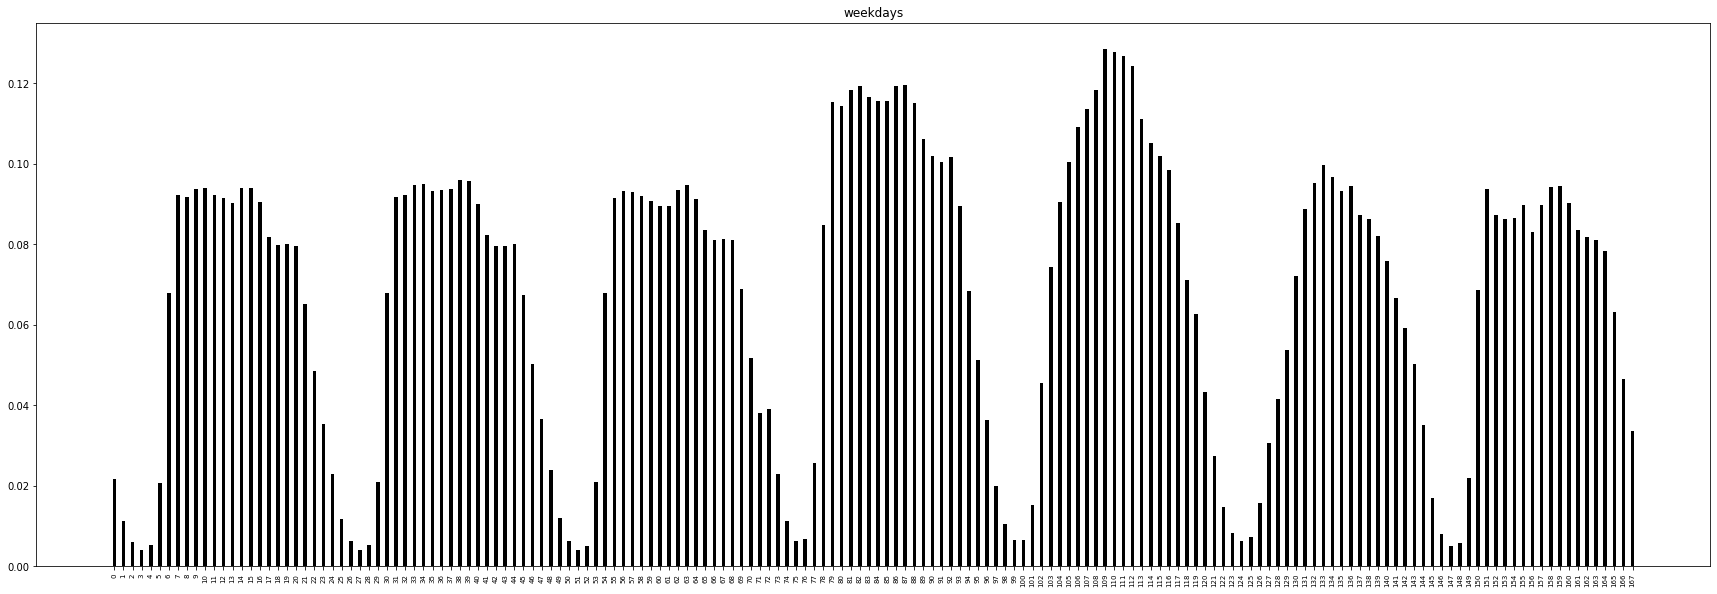

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (30, 10))
names = list(map(lambda x: str(x), range(len(authorities))))
plt.bar(names, authorities, color ='black', width = 0.4)
plt.xticks(rotation='vertical',fontsize=7)
plt.title('weekdays')
plt.show()

#### As it can be seen, the fifth day of the week has the most recording of the cameras of passing cars. We can conclude that, that day might be the most busy and populated day.

#### Now in this part we HITS value of cameras in below. 

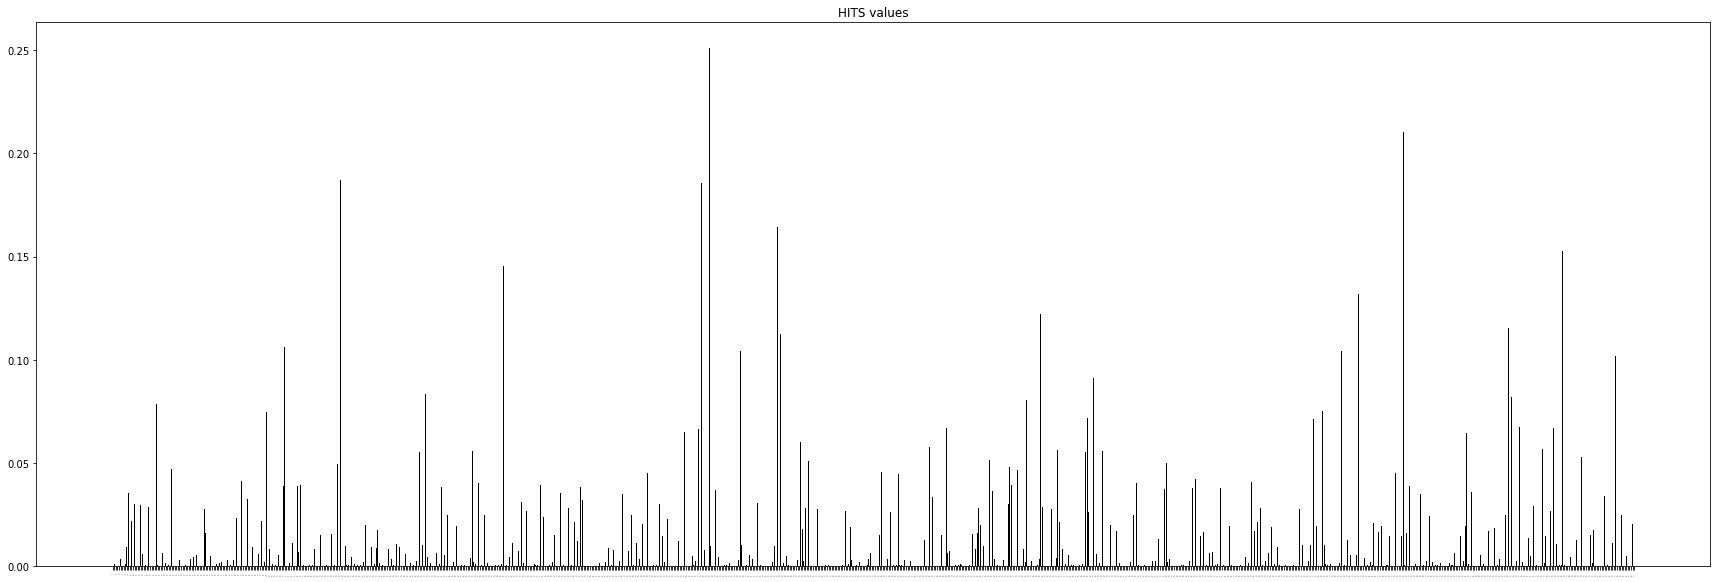

In [ ]:
fig = plt.figure(figsize = (30, 10))
names = list(map(lambda x: str(x), range(len(hubs))))
plt.bar(names, hubs, color ='black', width = 0.4)
plt.xticks(rotation='vertical',fontsize=1)
plt.title('HITS values')
plt.show()

#### As we can see we can coclude the amount of probability of activity of each cameras in specific hours which can shows that each road can be more crowded in each day of the week. But as I said it's just a posibility that shows the activity of recording of each camera and cannot conclude us to a valid results.

#### Now we can plot the histogram of the activity of each camera in specific hours of each day. The plots of this part are shown in below cell.

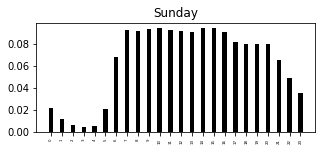

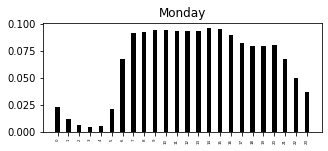

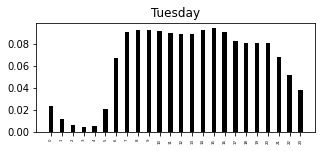

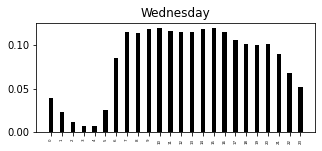

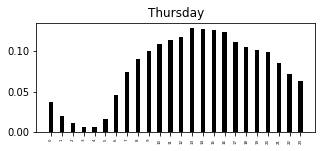

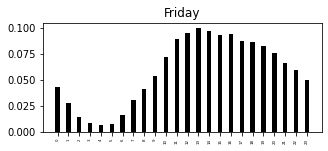

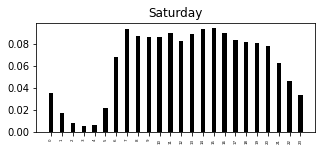

In [ ]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day_index, day in enumerate(days):
    fig = plt.figure(figsize = (5, 2))
    labels = list(map(lambda x: str(x), range(24)))
    chart = authorities[day_index*24: (day_index+1)*24]
    plt.bar(labels, chart, color ='black', width = 0.4)
    plt.xticks(rotation='vertical',fontsize=4)
    plt.title(day)
    plt.show()

#### As we can see, the amount of passing of cars in starting hours of the days are too low and it's too crowded in the middle of the day and night. The above histograms properly make sense with what is happening in real life because at the start of a data means, 00:00 people are still out of their houses and the streets are still crowded but at 03:00 AM streets become less crowded and at 05:00 AM that people starts to get out of their how for going to work, streets start to become more crowded and this process continues 09:00 PM and then streets start to become less crowded again because people go home at these hours. The behavior of people is different in different days. For example, morning of Fridays is less crowded because most of people in Iran are chilling or sleeping in their houses.

# Conclusion and Other Ideas
#### In this project, we deployed 6 ideas which some of them were recommended by project document and some of them were new. We could deploy more ideas for this data but unfortunately because of lack of time we couldn’t deploy them.
#### 1. One of these ideas are finding anomaly cars by checking difference between time of their passing through near cameras and if this time is informally fast, we can count them as anomaly and can consume penalty for them.
#### 2. The other one is following paths of cars by checking all history of their passing through different cameras in different times. With this approach we can find out that which streets each car passed during a specific time.
#### 3. One of the interesting ideas is to check time of activities of each camera to figure out in which times their activities were a lot and in which times not. With this analyzing we can check activities of cameras and for example set a program to turn on and off cameras when their activities are more or less than normal mode.
#### 4. Another interesting Ideas is controlling car traffic by checking amount passing cars through cameras and find most crowded streets and also find patterns of passing cars through each camera in each day of week.
#### 5. The other idea is to find pattern of people behavior in days of week and vacations and find their most interesting streets for advertising and marketing and find busiest streets for putting billboards.
